### Correlations for CO2/GDP/Pop

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pylab as pl

Read in data file

In [77]:
df=pd.read_csv('CO2_pivot_noCO2_930.csv')

# Remove all 2020 rows
df=df.drop(df[df['Year'] == 2020].index)



Remove all non-country entries, and add them to a new dataframe

In [78]:
non_country=['Africa Eastern and Southern','Africa Western and Central','Arab World','Caribbean small states','Central Europe and the Baltics','Early-demographic dividend','East Asia & Pacific','East Asia & Pacific (IDA & IBRD countries)','East Asia & Pacific (excluding high income)','Euro area','Europe & Central Asia','Europe & Central Asia (IDA & IBRD countries)','Europe & Central Asia (excluding high income)','European Union','Fragile and conflict affected situations','Heavily indebted poor countries (HIPC)','High income','IBRD only','IDA & IBRD total','IDA blend','IDA only','IDA total','Late-demographic dividend','Latin America & Caribbean','Latin America & Caribbean (excluding high income)','Latin America & the Caribbean (IDA & IBRD countries)','Least developed countries: UN classification','Low & middle income','Low income','Lower middle income','Middle East & North Africa','Middle East & North Africa (IDA & IBRD countries)','Middle East & North Africa (excluding high income)','Middle income','North America','OECD members','Other small states','Pacific island small states','Post-demographic dividend','Pre-demographic dividend','Small states','South Asia','South Asia (IDA & IBRD)','Sub-Saharan Africa','Sub-Saharan Africa (IDA & IBRD countries)','Sub-Saharan Africa (excluding high income)','Upper middle income','World',]
for count in non_country:
    df=df.drop(df[df['Country Name'] == count].index)

print(df.shape)

df.to_csv('CO2_pivot_noCO2_Countries_930.csv')



(3056, 931)


Create columns for CO2 per Capita and GDP per capita

In [79]:
df['CO2 per capita']=df['CO2 emissions (kt)']/df['Population, total']
df['GDP per capita']=df['GDP (current US$)']/df['Population, total']

df[(df['Country Name']=='United Kingdom')]['GDP per capita']
# df[(df['Country Name']==count)]['GDP (current US$)']

3859    40366.970642
3860    42104.788438
3861    44512.433024
3862    50397.682167
3863    47396.091656
3864    38744.131593
3865    39598.915757
3866    42109.707723
3867    42497.344789
3868    43426.243523
3869    47439.643711
3870    44964.373622
3871    40985.287463
3872    40572.150966
3873    43203.808876
3874    42662.577792
Name: GDP per capita, dtype: float64

Create list of catagories

In [80]:
print(df.shape)

cats=pd.DataFrame(df.columns.values)
cats.drop(1)

cats.to_csv('Series_names.csv')
# type(cats)
print(cats)

(3056, 933)
                                                     0
0                                           Unnamed: 0
1                                         Country Name
2                                                 Year
3    ARI treatment (% of children under 5 taken to ...
4    Access to clean fuels and technologies for coo...
..                                                 ...
928  Women who were first married by age 18 (% of w...
929  Women's share of population ages 15+ living wi...
930  Young people (ages 15-24) newly infected with HIV
931                                     CO2 per capita
932                                     GDP per capita

[933 rows x 1 columns]


Remove un-wanted index column

In [81]:
%%capture
# print(df)
df=df.drop('Unnamed: 0',1)
# df.shape

Testing looking up one country and one year

In [82]:
afganisatan=df[(df['Country Name']=='Afghanistan')&(df['Year']==2008)]
# print(afganisatan)

Creating correlations for all 3 series. Then adding all the outcomes to a new dataframe, corrlist.

In [83]:
countries=df['Country Name'].unique()
corrlist=pd.DataFrame(df['Country Name'].unique())
corrlist.columns=['Country Name']
co2_gdp_cor=[]
co2_pop_cor=[]
gdp_pop_cor=[]
co2_gdp_capita_cor=[]
co2_pop_capita_cor=[]
gdp_pop_capita_cor=[]


for count in countries:
    cor=df[(df['Country Name']==count)]['CO2 emissions (kt)'].corr(df[(df['Country Name']==count)]['GDP (current US$)'])
    co2_gdp_cor.append(cor)

corrlist['CO2/GDP']=co2_gdp_cor

for count in countries:
    cor=df[(df['Country Name']==count)]['CO2 emissions (kt)'].corr(df[(df['Country Name']==count)]['Population, total'])
    co2_pop_cor.append(cor)

corrlist['CO2/Pop']=co2_pop_cor

for count in countries:
    cor=df[(df['Country Name']==count)]['GDP (current US$)'].corr(df[(df['Country Name']==count)]['Population, total'])
    gdp_pop_cor.append(cor)

corrlist['GDP/Pop']=gdp_pop_cor

for count in countries:
    cor=df[(df['Country Name']==count)]['CO2 per capita'].corr(df[(df['Country Name']==count)]['GDP per capita'])
    co2_gdp_capita_cor.append(cor)

corrlist['CO2 capita/GDP capita']=co2_gdp_capita_cor

for count in countries:
    cor=df[(df['Country Name']==count)]['CO2 per capita'].corr(df[(df['Country Name']==count)]['Population, total'])
    co2_pop_capita_cor.append(cor)

corrlist['CO2 capita/Pop']=co2_pop_capita_cor

for count in countries:
    cor=df[(df['Country Name']==count)]['GDP per capita'].corr(df[(df['Country Name']==count)]['Population, total'])
    gdp_pop_capita_cor.append(cor)

corrlist['GDP capita/Pop']=gdp_pop_capita_cor


corrlist

,Country Name,CO2/GDP,CO2/Pop,GDP/Pop,CO2 capita/GDP capita,CO2 capita/Pop,GDP capita/Pop
0,Afghanistan,0.953843,0.845380,0.843792,0.931860,0.695727,0.644348
1,Albania,0.728934,-0.799527,-0.892734,0.789627,-0.851255,-0.907889
2,Algeria,0.694246,0.990865,0.658552,0.523238,0.965950,0.403453
3,Andorra,0.394701,0.766787,0.209314,0.341128,0.259760,-0.169216
4,Angola,0.578267,0.763355,0.350326,0.496977,0.023049,0.040203
...,...,...,...,...,...,...,...
186,"Venezuela, RB",0.846195,0.274444,0.946450,0.650695,-0.124547,0.930116
187,Viet Nam,0.950888,0.947778,0.995398,0.940201,0.946655,0.994372
188,"Yemen, Rep.",0.144301,-0.633956,0.580068,0.153092,-0.824813,0.319294
189,Zambia,0.687603,0.954729,0.814469,0.370114,0.935116,0.560745


Create histograms of the correlations.

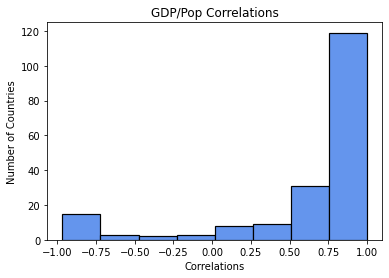

In [84]:

pl.hist(corrlist['CO2/GDP'],bins=8,color='cornflowerblue',edgecolor='black', linewidth=1.2)
pl.xlabel('Correlations')
pl.ylabel('Number of Countries')
pl.title('CO2/GDP Correlations',loc='center')
pl.savefig('CO2_GDP Correlations.pdf')
pl.clf()

pl.hist(corrlist['CO2/Pop'],bins=8,color='cornflowerblue',edgecolor='black', linewidth=1.2)
pl.xlabel('Correlations')
pl.ylabel('Number of Countries')
pl.title('CO2/Pop Correlations',loc='center')
pl.savefig('CO2_Pop Correlations.pdf')
pl.clf()

pl.hist(corrlist['GDP/Pop'],bins=8,color='cornflowerblue',edgecolor='black', linewidth=1.2)
pl.xlabel('Correlations')
pl.ylabel('Number of Countries')
pl.title('GDP/Pop Correlations',loc='center')
pl.savefig('GDP_Pop Correlations.pdf')




Create a histogram combing all 3 correlations

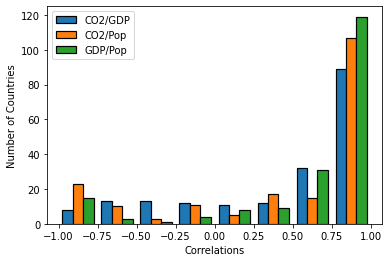

In [85]:
pl.hist(corrlist[['CO2/GDP','CO2/Pop','GDP/Pop']],bins=8,range=(-1,1),histtype='bar',edgecolor='black', linewidth=1.2,label=['CO2/GDP','CO2/Pop','GDP/Pop'])
pl.legend()
pl.xlabel('Correlations')
pl.ylabel('Number of Countries')
pl.savefig('Combined Correlations.pdf')

Create a scatter plot for CO2 - GDP for each country

In [86]:
%%capture
for count in countries:
    GDP=df[(df['Country Name']==count)]['GDP (current US$)']
    CO2=df[(df['Country Name']==count)]['CO2 emissions (kt)']
    corr=corrlist[corrlist['Country Name']==count]['CO2/GDP']
    pl.scatter(GDP,CO2,label='r='+str(np.round(corr.iloc[0],2)))
    pl.legend()
    pl.title(count)
    pl.ylabel('CO2 emissions (kt)')
    pl.xlabel('GDP (current US$)')
    years=df[(df['Country Name']==count)]['Year']
    for i,txt in enumerate(years):
        pl.text(GDP.iloc[i],CO2.iloc[i],txt)

    pl.savefig('CO2_GDP Plots/'+ count +' CO2_GDP.pdf')
    pl.clf()

Create a scatter plot for CO2 per capita - GDP per capita for each country

In [87]:
%%capture
for count in countries:
    GDP=df[(df['Country Name']==count)]['GDP per capita']
    CO2=df[(df['Country Name']==count)]['CO2 per capita']
    corr=corrlist[corrlist['Country Name']==count]['CO2 capita/GDP capita']
    pl.scatter(GDP,CO2*1000,label='r='+str(np.round(corr.iloc[0],2)))
    pl.legend()
    pl.title(count)
    pl.ylabel('CO2 per capita (t)')
    pl.xlabel('GDP capita')
    years=df[(df['Country Name']==count)]['Year']
    for i,txt in enumerate(years):
        pl.text(GDP.iloc[i],CO2.iloc[i]*1000,txt)

    pl.savefig('CO2_GDP_capita Plots/'+ count +' CO2_GDP_capita.pdf')
    pl.clf()

Create World Dataframe to include world values from original data.

Then calculate CO2 and GDP per capita for world data.

In [88]:
# Load original data again
df_all=pd.read_csv('CO2_pivot_noCO2_930.csv')
# Remove all 2020 rows
df_all=df_all.drop(df_all[df_all['Year'] == 2020].index)

# Create world df with year as first column
all_years=df_all['Year'].unique()
world=pd.DataFrame(all_years)
world.columns=['Year']

# Move all data from df_all to new world df
world_co2=df_all[(df_all['Country Name']=='World')]['CO2 emissions (kt)']
world_gdp=df_all[(df_all['Country Name']=='World')]['GDP (current US$)']
world_pop=df_all[(df_all['Country Name']=='World')]['Population, total']
world['CO2 emissions (kt)']= world_co2.values
world['GDP (current US$)']= world_gdp.values
world['Population, total']= world_pop.values

# Calculate per capita values for world
world['CO2 per capita']=world['CO2 emissions (kt)']/world['Population, total']
world['GDP per capita']=world['GDP (current US$)']/world['Population, total']
world['Population, average']=world['Population, total']/191

world


,Year,CO2 emissions (kt),GDP (current US$),"Population, total",CO2 per capita,GDP per capita,"Population, average"
0,2004,27331852.94,4.411620e+13,6471033757,0.004224,6817.488775,3.387976e+07
1,2005,28371817.05,4.776030e+13,6552787172,0.004330,7288.547414,3.430779e+07
2,2006,29308175.54,5.174980e+13,6635162568,0.004417,7799.326613,3.473907e+07
3,2007,30418994.07,5.831490e+13,6717583637,0.004528,8680.933971,3.517059e+07
4,2008,30632298.65,6.407230e+13,6801421733,0.004504,9420.427451,3.560954e+07
5,2009,30238050.03,6.071830e+13,6885608628,0.004391,8818.145683,3.605031e+07
6,2010,32095872.94,6.651420e+13,6969894715,0.004605,9543.070982,3.649160e+07
7,2011,33079721.35,7.395780e+13,7053988749,0.004690,10484.536144,3.693188e+07
8,2012,33460087.50,7.560400e+13,7141430933,0.004685,10586.673835,3.738969e+07
9,2013,34119894.39,7.775140e+13,7229458453,0.004720,10754.802798,3.785057e+07


Calculate per capita values normalised against world per capita values in 2019, for CO2 and GDP.
For Population normalise against the average countries population in 2019


This makes the per capita values easier to compare when looking at different countries 

In [89]:
df['CO2 per capita NORM']=df['CO2 per capita'].values/world[(world['Year']==2019)]['CO2 per capita'].values
df['GDP per capita NORM']=df['GDP per capita'].values/world[(world['Year']==2019)]['GDP per capita'].values
df['Population NORM']=df['Population, total'].values/world[(world['Year']==2019)]['Population, average'].values

# Test country
df[(df['Country Name']=='Spain')]['Population NORM']


3400    1.058811
3401    1.076850
3402    1.095207
3403    1.115669
3404    1.133611
3405    1.143696
3406    1.148974
3407    1.153064
3408    1.153813
3409    1.150038
3410    1.146605
3411    1.145716
3412    1.146684
3413    1.149377
3414    1.154422
3415    1.162737
Name: Population NORM, dtype: float64

Create a scatter plot for CO2 per capita Normalised against World - GDP per capita Normalised against World for each country

In [90]:
%%capture
for count in countries:
    GDP=df[(df['Country Name']==count)]['GDP per capita NORM']
    CO2=df[(df['Country Name']==count)]['CO2 per capita NORM']
    corr=corrlist[corrlist['Country Name']==count]['CO2 capita/GDP capita']
    pl.scatter(GDP,CO2,label='r='+str(np.round(corr.iloc[0],2)))
    pl.legend()
    pl.title(count)
    pl.ylabel('CO2 per capita/World CO2 per capita (2019)')
    pl.xlabel('GDP per capita/World GDP per capita (2019)')
    years=df[(df['Country Name']==count)]['Year']
    for i,txt in enumerate(years):
        pl.text(GDP.iloc[i],CO2.iloc[i],txt)
    pl.savefig('CO2_GDP_capita_NORM Plots/'+ count +' CO2_GDP_capita_NORM.pdf')
    pl.clf()

Create a scatter plot for CO2 per capita Normalised against World - Population Normalised against average country size

In [91]:
%%capture
for count in countries:
    POP=df[(df['Country Name']==count)]['Population NORM']
    CO2=df[(df['Country Name']==count)]['CO2 per capita NORM']
    corr=corrlist[corrlist['Country Name']==count]['CO2 capita/Pop']
    pl.scatter(POP,CO2,label='r='+str(np.round(corr.iloc[0],2)))
    pl.legend()
    pl.title(count)
    pl.ylabel('CO2 per capita/World CO2 per capita (2019)')
    pl.xlabel('Pop/Average Pop(2019)')
    years=df[(df['Country Name']==count)]['Year']
    for i,txt in enumerate(years):
        pl.text(POP.iloc[i],CO2.iloc[i],txt)
    pl.savefig('CO2_POP_capita_NORM Plots/'+ count +' CO2_POP_capita_NORM.pdf')
    pl.clf()

In [92]:
df
df['Female headed households (% of households with a female head)'].describe()

count    195.000000
mean      25.338462
std        9.043686
min        1.700000
25%       18.800000
50%       24.900000
75%       31.050000
max       49.400000
Name: Female headed households (% of households with a female head), dtype: float64

Add a Column to Corrlist for GDP per capita in 2019.

In [93]:
gdp_capita_2019=[]


for count in countries:
    cor=df[(df['Country Name']==count) & (df['Year']==2019)]['GDP per capita NORM']
    gdp_capita_2019.append(cor.values[0])

corrlist['GDP capita NORM 2019']=gdp_capita_2019

corrlist


,Country Name,CO2/GDP,CO2/Pop,GDP/Pop,CO2 capita/GDP capita,CO2 capita/Pop,GDP capita/Pop,GDP capita NORM 2019
0,Afghanistan,0.953843,0.845380,0.843792,0.931860,0.695727,0.644348,0.043821
1,Albania,0.728934,-0.799527,-0.892734,0.789627,-0.851255,-0.907889,0.475082
2,Algeria,0.694246,0.990865,0.658552,0.523238,0.965950,0.403453,0.398831
3,Andorra,0.394701,0.766787,0.209314,0.341128,0.259760,-0.169216,3.638567
4,Angola,0.578267,0.763355,0.350326,0.496977,0.023049,0.040203,0.192926
...,...,...,...,...,...,...,...,...
186,"Venezuela, RB",0.846195,0.274444,0.946450,0.650695,-0.124547,0.930116,NaN
187,Viet Nam,0.950888,0.947778,0.995398,0.940201,0.946655,0.994372,0.307355
188,"Yemen, Rep.",0.144301,-0.633956,0.580068,0.153092,-0.824813,0.319294,NaN
189,Zambia,0.687603,0.954729,0.814469,0.370114,0.935116,0.560745,0.111645


Plot Showing when CO2 and GDP become unlinked - Plot CO2/GDP_Corr against GDP_Capita_Norm

/var/folders/8j/2xw6vvr51bsczxp4p37711lx24bqhv/T/ipykernel_6416/3881640386.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  pl.legend()


Text(0.5, 0, 'GDP capita NORM 2019')

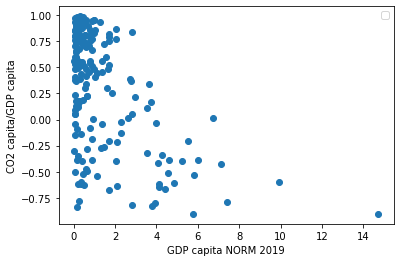

In [111]:
pl.scatter(corrlist['GDP capita NORM 2019'],corrlist['CO2 capita/GDP capita'])
pl.legend()
# pl.title()
pl.ylabel('CO2 capita/GDP capita')
pl.xlabel('GDP capita NORM 2019')
# pl.savefig('CO2_GDP_Corr/GDP_capita_Norm_2019.pdf')
# pl.clf()

In [95]:
%%capture
for count in countries:
    GDP=df[(df['Country Name']==count)]['GDP per capita NORM']
    CO2=df[(df['Country Name']==count)]['CO2 per capita NORM']
    corr=corrlist[corrlist['Country Name']==count]['CO2 capita/GDP capita']
    pl.scatter(GDP,CO2,label='r='+str(np.round(corr.iloc[0],2)))
    pl.legend()
    pl.title(count)
    pl.ylabel('CO2 per capita/World CO2 per capita (2019)')
    pl.xlabel('GDP per capita/World GDP per capita (2019)')
    years=df[(df['Country Name']==count)]['Year']
    for i,txt in enumerate(years):
        pl.text(GDP.iloc[i],CO2.iloc[i],txt)
    pl.savefig('CO2_GDP_capita_NORM Plots/'+ count +' CO2_GDP_capita_NORM.pdf')
    pl.clf()

### Correlation Matrix
```
DataFrame.corr(method='pearson', min_periods=1, numeric_only=False)
```

In [96]:
pd.__version__

'1.4.2'

In [97]:
import seaborn as sb

In [98]:
corr_matrix=df.corr()

<Axes: >

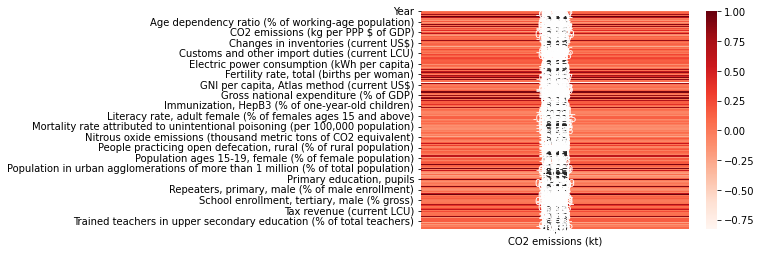

In [99]:
sb.heatmap(corr_matrix.loc[:,['CO2 emissions (kt)']], cmap="Reds", annot=True)